# Systems Dynamics

This notebook contains code examples referring to the Systems Dynamics chapter of "Applied Mathematics with Open-Source Software: Operational Research Problems
with Python and R".

First we create a function that returns the derivatives according to the differential equations given in the chapter.

In [1]:
def derivatives(t, y, vaccine_rate, birth_rate=0.01):
    """Defines the system of differential equations that describe
    the epidemiology model.

    Args:
        t: a positive float
        y: a tuple of three integers
        vaccine_rate: a positive float <= 1
        birth_rate: a positive float <= 1 (default: 0.01)

    Returns:
        A tuple containing dS, dI, and dR
    """
    infection_rate = 0.3
    recovery_rate = 0.02
    death_rate = 0.01
    S, I, R = y
    N = S + I + R
    dSdt = (
        -((infection_rate * S * I) / N)
        + ((1 - vaccine_rate) * birth_rate * N)
        - (death_rate * S)
    )
    dIdt = (
        ((infection_rate * S * I) / N)
        - (recovery_rate * I)
        - (death_rate * I)
    )
    dRdt = (
        (recovery_rate * I)
        - (death_rate * R)
        + (vaccine_rate * birth_rate * N)
    )
    return dSdt, dIdt, dRdt

An example of using this:

In [2]:
print(derivatives(t=0.0, y=(4, 1, 0), vaccine_rate=0.5))

Then we define a function that numerically solves the given system over a period of time.

In [3]:
from scipy.integrate import solve_ivp


def solve_ode(
    derivative_function,
    t_span,
    y0=(2999, 1, 0),
    vaccine_rate=0.85,
    birth_rate=0.01,
):
    """Numerically solve the system of differential equations.

    Args:
        derivative_function: a function returning a tuple
                             of three floats
        t_span: endpoints of the time range to integrate over
        y0: a tuple of three integers (default: (2999, 1, 0))
        vaccine_rate: a positive float <= 1 (default: 0.85)
        birth_rate: a positive float <= 1 (default: 0.01)

    Returns:
        A tuple of four arrays
    """
    sol = solve_ivp(
        derivative_function,
        t_span,
        y0,
        args=(vaccine_rate, birth_rate),
    )
    t, S, I, R = sol.t, sol.y[0], sol.y[1], sol.y[2]
    return t, S, I, R

Solving the system with no vaccines

In [4]:
t_span = [0, 730]
t, S, I, R = solve_ode(derivatives, t_span, vaccine_rate=0.0)

And plotting:

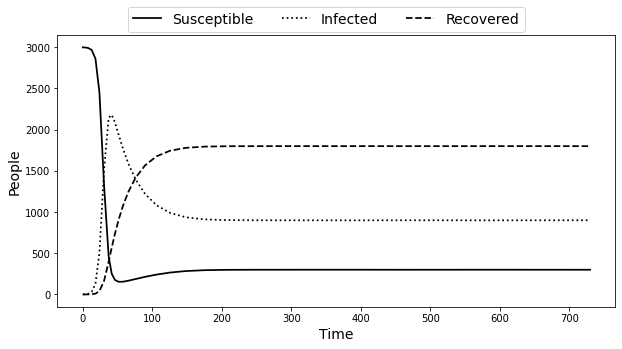

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(t, S, label='Susceptible', c='black', linestyle='solid', linewidth=1.75)
ax.plot(t, I, label='Infected', c='black', linestyle='dotted', linewidth=1.75)
ax.plot(t, R, label='Recovered', c='black', linestyle='dashed', linewidth=1.75)
ax.legend(fontsize=14, frameon=True, ncol=3, bbox_to_anchor=(0.85, 1.13))
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('People', fontsize=14)
plt.show()

Solving the system with vaccines

In [6]:
t, S, I, R = solve_ode(derivatives, t_span, vaccine_rate=0.85)

And plotting:

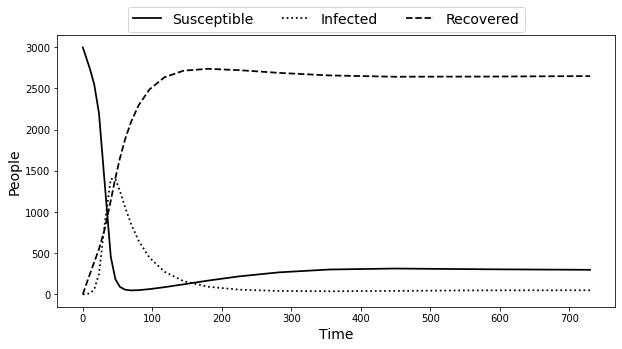

In [7]:
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(t, S, label='Susceptible', c='black', linestyle='solid', linewidth=1.75)
ax.plot(t, I, label='Infected', c='black', linestyle='dotted', linewidth=1.75)
ax.plot(t, R, label='Recovered', c='black', linestyle='dashed', linewidth=1.75)
ax.legend(fontsize=14, frameon=True, ncol=3, bbox_to_anchor=(0.85, 1.13))
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('People', fontsize=14)
plt.show()

Next we define a function to calculate the total cost over two years.

In [8]:
def daily_cost(
    derivative_function=derivatives, vaccine_rate=0.85
):
    """Calculates the daily cost to the public health system after
    2 years.

    Args:
        derivative_function: a function returning a tuple
                             of three floats
        vaccine_rate: a positive float <= 1 (default: 0.85)

    Returns:
        the daily cost
    """
    birth_rate = 0.01
    vaccine_cost = 220
    medication_cost = 10
    t_span = [0, 730]
    t, S, I, R = solve_ode(
        derivatives,
        t_span,
        vaccine_rate=vaccine_rate,
        birth_rate=birth_rate,
    )
    N = S[-1] + I[-1] + R[-1]
    daily_vaccine_cost = (
        N * birth_rate * vaccine_rate * vaccine_cost
    )
    daily_meds_cost = I[-1] * medication_cost
    return daily_vaccine_cost + daily_meds_cost

The cost without vaccines

In [9]:
cost = daily_cost(vaccine_rate=0.0)
print(round(cost, 2))

9002.33


The cost with vaccines

In [10]:
cost = daily_cost(vaccine_rate=0.85)
print(round(cost, 2))

6119.14
